In [1]:
import gizmo_analysis as gizmo
import numpy as np
from astropy.io.ascii import read
import matplotlib.pyplot as plt

In [2]:
sim_dir = '../../../data/latte_metaldiff/m12i_res7100/'
part = gizmo.io.Read.read_snapshots(['star'], 'redshift', 0, sim_dir, assign_hosts_rotation=True, assign_formation_coordinates=True,)


# in utilities.simulation.Snapshot():
* reading:  data/latte_metaldiff/m12i_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/latte_metaldiff/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  data/latte_metaldiff/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.ParticleCoordinate():
  read 1 host (position, velocity, principal axes)

In [4]:
import utilities as ut

In [136]:
form_z = part["star"].prop("form.redshift")
form_radii = part["star"].prop("form.host.distance.total")
radii = part["star"].prop("host.distance.total")
mass = part["star"].prop("mass")

redshifts = np.linspace(0., 10, 20)

dmask = radii < 15
mmp_mask = radii < 300
dform_mask = form_radii < 30

cdf = []
num = []
den = []
    
for i in np.arange(0, len(redshifts)-1):
    zmask = (form_z > redshifts[i])
        
    m1 = dmask & zmask & dform_mask
    m2 = dmask & zmask
        
    total_z_mass = np.sum(mass[m1])
    total_z0_mass = np.sum(mass[m2])
    
    num.append(total_z_mass)
    den.append(total_z0_mass)
        
    cdf.append(total_z_mass / total_z0_mass)

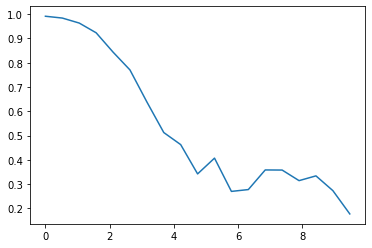

In [137]:
plt.plot(redshifts[:-1], cdf)

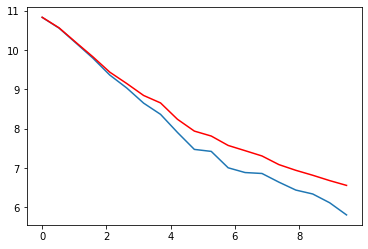

In [138]:
fig, ax = plt.subplots()
ax.plot(redshifts[:-1], np.log10(num))
ax.plot(redshifts[:-1], np.log10(den), c='r')
plt.show()

In [139]:
cdf = np.array(cdf)
intersection_idx = np.argmin((cdf - 0.5) ** 2)
z_intersect = redshifts[intersection_idx]
cdf_intersect = cdf[intersection_idx]

In [140]:
z_intersect

3.6842105263157894

In [141]:
cdf_intersect

0.51255286